# Checkpoint Three: Cleaning Data

Now you are ready to clean your data. Before starting coding, provide the link to your dataset below.

My dataset: https://www.kaggle.com/datasets/fabdelja/autism-screening-for-toddlers?resource=download

Import the necessary libraries and create your dataframe(s).

In [159]:
# importing pandas libraries to read and perform actions on the dataset
import pandas as pd

# importing libraries for visualization
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

#reading dataset into dataframe
df_autism = pd.read_csv("Toddler Autism dataset July 2018.csv")


# Check if the data is uploaded in dataframe 
df_autism.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


## Missing Data

Test your dataset for missing data and handle it as needed. Make notes in the form of code comments as to your thought process.

In [160]:
# Check for missing data in the dataframe for each column

df_autism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Case_No                 1054 non-null   int64 
 1   A1                      1054 non-null   int64 
 2   A2                      1054 non-null   int64 
 3   A3                      1054 non-null   int64 
 4   A4                      1054 non-null   int64 
 5   A5                      1054 non-null   int64 
 6   A6                      1054 non-null   int64 
 7   A7                      1054 non-null   int64 
 8   A8                      1054 non-null   int64 
 9   A9                      1054 non-null   int64 
 10  A10                     1054 non-null   int64 
 11  Age_Mons                1054 non-null   int64 
 12  Qchat-10-Score          1054 non-null   int64 
 13  Sex                     1054 non-null   object
 14  Ethnicity               1054 non-null   object
 15  Jaun

In [161]:
# Option 2 finfind missing data via percentage
# if it's a larger dataset and the visualization takes too long can do this.
# % of missing.


for col in df_autism.columns:
    pct_missing = np.mean(df_autism[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Case_No - 0%
A1 - 0%
A2 - 0%
A3 - 0%
A4 - 0%
A5 - 0%
A6 - 0%
A7 - 0%
A8 - 0%
A9 - 0%
A10 - 0%
Age_Mons - 0%
Qchat-10-Score - 0%
Sex - 0%
Ethnicity - 0%
Jaundice - 0%
Family_mem_with_ASD - 0%
Who completed the test - 0%
Class/ASD Traits  - 0%


In [162]:
# Looks like there is no missing data in my dataset so i will move on to the 2nd dirty data - Irregular data analysis.

# Even though there is no missing data, I am checking how complete data by using isna() and sum() method.
df_autism.isna().sum()

Case_No                   0
A1                        0
A2                        0
A3                        0
A4                        0
A5                        0
A6                        0
A7                        0
A8                        0
A9                        0
A10                       0
Age_Mons                  0
Qchat-10-Score            0
Sex                       0
Ethnicity                 0
Jaundice                  0
Family_mem_with_ASD       0
Who completed the test    0
Class/ASD Traits          0
dtype: int64

## Irregular Data

Detect outliers in your dataset and handle them as needed. Use code comments to make notes about your thought process.

In [163]:
# finding the datatype of each column to know if it is numeric or categorical for outliers
df_autism.dtypes

Case_No                    int64
A1                         int64
A2                         int64
A3                         int64
A4                         int64
A5                         int64
A6                         int64
A7                         int64
A8                         int64
A9                         int64
A10                        int64
Age_Mons                   int64
Qchat-10-Score             int64
Sex                       object
Ethnicity                 object
Jaundice                  object
Family_mem_with_ASD       object
Who completed the test    object
Class/ASD Traits          object
dtype: object

In [164]:
# Finding unique values for the categorical columns A1 to A10
columns = [['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10']]
for c in columns:
    print(df_autism[c].nunique())
    

A1     2
A2     2
A3     2
A4     2
A5     2
A6     2
A7     2
A8     2
A9     2
A10    2
dtype: int64


In [165]:
# Finding unique values for the categorical question column
columns = [['Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice', 'Family_mem_with_ASD', 'Who completed the test']]
for c in columns:
    print(df_autism[c].nunique())


Qchat-10-Score            11
Sex                        2
Ethnicity                 11
Jaundice                   2
Family_mem_with_ASD        2
Who completed the test     5
dtype: int64


<AxesSubplot:>

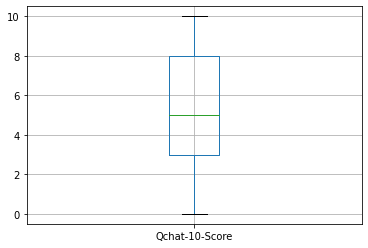

In [166]:
# Finding if there are any outliers in the score
df_autism.boxplot(column=['Qchat-10-Score'])

In [167]:
# I don't see any outliers in the dataset, which is good, so moving on to unncessary data analysis

## Unnecessary Data

Look for the different types of unnecessary data in your dataset and address it as needed. Make sure to use code comments to illustrate your thought process.

In [168]:
# Checking categoricle value for column 'who completed the test'to see if any data needs to be deleted 
df_autism['Who completed the test'].value_counts()

family member               1018
Health Care Professional      24
Health care professional       5
Self                           4
Others                         3
Name: Who completed the test, dtype: int64

In [169]:
# Looks like column 'Who completed the test' has no unnecessary data that I need to delete but I need to be change the case for
# Health care professional. 
# I see self and others are very less records, something I need to considerate during analysis

In [170]:
# Checking categoricle value for column 'Ethnicity'to see if any data needs to be deleted 
df_autism['Ethnicity'].value_counts()

White European    334
asian             299
middle eastern    188
south asian        60
black              53
Hispanic           40
Others             35
Latino             26
mixed               8
Pacifica            8
Native Indian       3
Name: Ethnicity, dtype: int64

In [171]:
# Looks like column 'Ethnicity' has no unnecessary data that I need to delete 

In [172]:
# Checking categoricle value for column 'Sex'to see if any data needs to be deleted 
df_autism['Sex'].value_counts()

m    735
f    319
Name: Sex, dtype: int64

In [173]:
# Looks like column 'Sex' has no unnecessary data that I need to delete 

In [174]:
# Checking for duplicates in the dataset 
df_autism.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1049    False
1050    False
1051    False
1052    False
1053    False
Length: 1054, dtype: bool

In [175]:
# I don't see any duplicates or unncessary data - now moving to inconsistent data analysis

## Inconsistent Data

Check for inconsistent data and address any that arises. As always, use code comments to illustrate your thought process.

In [176]:
# Renaming column name "Class/ASD Traits" to remove the space at the end
df_autism.rename(columns = {'Class/ASD Traits ' : 'Class/ASD Traits'}, inplace = True)

# Validating the name change
df_autism.columns

Index(['Case_No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age_Mons', 'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice',
       'Family_mem_with_ASD', 'Who completed the test', 'Class/ASD Traits'],
      dtype='object')

In [177]:
# Correcting the inconsistent data for categorical column 'Who completed the test' - 
# correcting the case - Health Care Proffesional values
df_autism['Who completed the test'] = df_autism['Who completed the test'].replace({'Health care professional': 'Health Care Professional'})

# Validating the correction values
df_autism['Who completed the test'].value_counts()

family member               1018
Health Care Professional      29
Self                           4
Others                         3
Name: Who completed the test, dtype: int64

In [178]:
# Replacing categorical question columns A1 to A10 with answers yes or no for 1 and 0 for better readability and analysis
df_autism['A1'] = df_autism.A1.replace({1: 'Yes', 0: 'No'})
df_autism['A2'] = df_autism.A2.replace({1: 'Yes', 0: 'No'})
df_autism['A3'] = df_autism.A3.replace({1: 'Yes', 0: 'No'})
df_autism['A4'] = df_autism.A4.replace({1: 'Yes', 0: 'No'})
df_autism['A5'] = df_autism.A5.replace({1: 'Yes', 0: 'No'})
df_autism['A6'] = df_autism.A6.replace({1: 'Yes', 0: 'No'})
df_autism['A7'] = df_autism.A7.replace({1: 'Yes', 0: 'No'})
df_autism['A8'] = df_autism.A8.replace({1: 'Yes', 0: 'No'})
df_autism['A9'] = df_autism.A9.replace({1: 'Yes', 0: 'No'})
df_autism['A10'] = df_autism.A10.replace({1: 'Yes', 0: 'No'})


# Validating the update
print(df_autism['A1'].value_counts(),'\n',
df_autism['A2'].value_counts(), '\n',
df_autism['A3'].value_counts(),'\n',
df_autism['A4'].value_counts(),'\n',
df_autism['A5'].value_counts(),'\n',
df_autism['A6'].value_counts(),'\n',
df_autism['A7'].value_counts(),'\n',
df_autism['A8'].value_counts(),'\n',
df_autism['A9'].value_counts(),'\n',
df_autism['A10'].value_counts())

Yes    594
No     460
Name: A1, dtype: int64 
 No     581
Yes    473
Name: A2, dtype: int64 
 No     631
Yes    423
Name: A3, dtype: int64 
 Yes    540
No     514
Name: A4, dtype: int64 
 Yes    553
No     501
Name: A5, dtype: int64 
 Yes    608
No     446
Name: A6, dtype: int64 
 Yes    685
No     369
Name: A7, dtype: int64 
 No     570
Yes    484
Name: A8, dtype: int64 
 No     538
Yes    516
Name: A9, dtype: int64 
 Yes    618
No     436
Name: A10, dtype: int64


In [179]:
# Replacing categorical gender column 'Sex' with answers Male or Female for m and f for better readability and analysis

df_autism['Sex'] = df_autism.Sex.replace({'m': 'Male', 'f': 'Female'})

# Validating the update
df_autism['Sex'].value_counts()

Male      735
Female    319
Name: Sex, dtype: int64

In [180]:
# Displaying the final output after cleaning the dataset
df_autism.head(50)

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,No,No,No,No,No,No,Yes,Yes,No,Yes,28,3,Female,middle eastern,yes,no,family member,No
1,2,Yes,Yes,No,No,No,Yes,Yes,No,No,No,36,4,Male,White European,yes,no,family member,Yes
2,3,Yes,No,No,No,No,No,Yes,Yes,No,Yes,36,4,Male,middle eastern,yes,no,family member,Yes
3,4,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,24,10,Male,Hispanic,no,no,family member,Yes
4,5,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,20,9,Female,White European,no,yes,family member,Yes
5,6,Yes,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,21,8,Male,black,no,no,family member,Yes
6,7,Yes,No,No,Yes,Yes,Yes,No,No,Yes,No,33,5,Male,asian,yes,no,family member,Yes
7,8,No,Yes,No,No,Yes,No,Yes,Yes,Yes,Yes,33,6,Male,asian,yes,no,family member,Yes
8,9,No,No,No,No,No,No,Yes,No,No,Yes,36,2,Male,asian,no,no,family member,No
9,10,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,Yes,22,8,Male,south asian,no,no,Health Care Professional,Yes


In [181]:
# Exporting the final output to file
df_autism.to_csv('Toddler Autism dataset July 2018_cleaned.csv')

print("Checkpoint 3 - Data Cleaninig for the project completed")

Checkpoint 3 - Data Cleaninig for the project completed


## Summarize Your Results

Make note of your answers to the following questions.

1. Did you find all four types of dirty data in your dataset?
   I checked all the four dirty data types and found the below:
   1) Missing Data - no missing values.
   2) Irregular Data - no outliners found but made some notes of few categorical columns.
   3) Unncessary Data - no duplicates or unncessary data found.
   4) Inconsistent Data - reamed few columns and replaced values of categorical columns.
2. Did the process of cleaning your data give you new insights into your dataset? 
   Yes on the categorical columns and their values.
3. Is there anything you would like to make note of when it comes to manipulating the data and making visualizations?
   No, the new cleaned data file has all the information I need for manipulation and visualisation.